<a href="https://colab.research.google.com/github/tanmaybohra/Appliances-Energy-Prediction/blob/main/Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

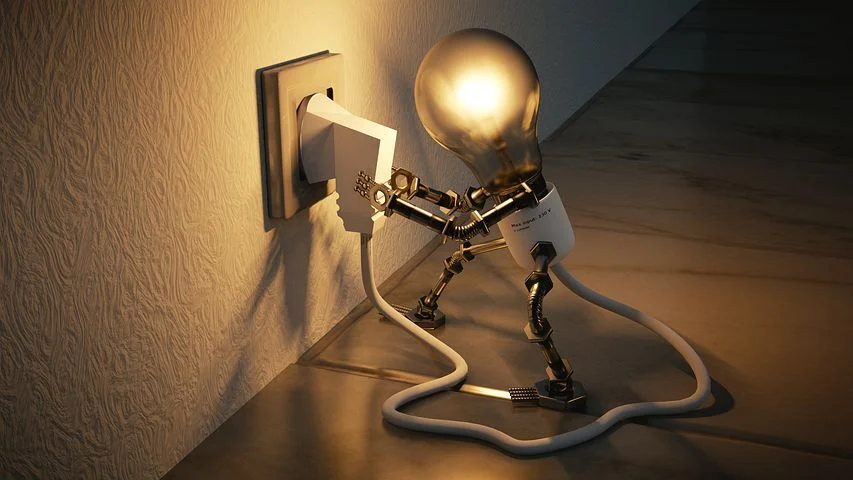

**Appliance Energy Prediction**

In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even in today’s time there are many places especially in developing world where there are outages. These outages are primary because of excess load consumed by appliances at home. Heating and cooling appliances takes most power in house. In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months . The goal is to predict energy consumption by appliances .
In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors. 

**Problem Statement**

We should predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning model using regression algorithms. Regression algorithms are used as data consist of continuous features and there are no identification of appliances in dataset

**Attribute Information**

1. ***date*** time year-month-day hour:minute:second

2. ***Appliances***, energy use in Wh (**Dependent variable**)

3. ***lights***, energy use of light fixtures in the house in Wh (Drop this column)

4. ***T1***, Temperature in kitchen area, in Celsius

5. ***RH1***, Humidity in kitchen area, in % 

6. ***T2***, Temperature in living room area, in Celsius 

7. ***RH2***,Humidity in living room area, in %

8. ***T3***, Temperature in laundry room area

9. ***RH3***, Humidity in laundry room area, in % 

10. ***T4***, Temperature in office room, in Celsius 

11. ***RH4***,Humidity in office room, in %

12. ***T5***, Temperature in bathroom, in Celsius

13. ***RH5***, Humidity in bathroom, in % 

14. ***T6***, Temperature outside the building (north side), in Celsius

15. ***RH6***, Humidity outside the building (north side), in %

16. ***T7***, Temperature in ironing room , in Celsius

17. ***RH7***, Humidity in ironing room, in % 

18. ***T8***, Temperature in teenager room 2, in Celsius 

19. ***RH8***,Humidity in teenager room 2, in %


20. ***T9***, Temperature in parents room, in Celsius

21. ***RH9***, Humidity in parents room, in % 

22. ***To***, Temperature outside (from Chievres weather station), in
Celsius 

23. ***Pressure*** (from Chievres weather station), in mm Hg 

24. ***RHout***, Humidity outside (from
Chievres weather station), in %

25. ***Wind speed*** (from Chievres weather station), in m/s

26. ***Visibility*** (from Chievres weather station), in km

27. ***Tdewpoint*** (from Chievres weather station), Â°C

28. ***rv1***, Random variable 1, nondimensional

29. ***rv2***, Random variable 2, nondimensional


In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the data**

In [3]:
file_path = ('/content/drive/MyDrive/Copy of data_application_energy.csv')
df = pd.read_csv(file_path)

#  **Data Exploration**

In [4]:
df.shape

(19735, 29)

Number of instances: 19,735

Number of attributes: 29

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
# #Number of null values in all columns

df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

As shown above , there are no null values in the dataset

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
temp = {
    'T1' : 'kitchen_temp', 'T2' : 'living_temp', 'T3' : 'laundry_temp', 
    'T4' : 'office_temp', 'T5' : 'bath_temp', 'T6' : 'outside_temp',
    'T7' : 'ironing_temp', 'T8' : 'teen_temp', 'T9' : 'parents_temp', 'T_out' : 'station_temp'
  }

In [9]:
energy = df.rename(columns=temp)

In [10]:
humid = {
    'RH_1' : 'kitchen_humid', 'RH_2' : 'living_humid', 'RH_3' : 'laundry_humid', 
    'RH_4' : 'office_humid', 'RH_5' : 'bath_humid', 'RH_6' : 'outside_humid',
    'RH_7' : 'ironing_humid', 'RH_8' : 'teen_humid', 'RH_9' : 'parents_humid', 'RH_out' : 'station_humid'
}

In [11]:
energy = energy.rename(columns=humid)

## ***Data Visualization***

In [12]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 3.1 MB/s 


In [13]:
import chart_studio.plotly as pyp
import plotly.graph_objs as go

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
import math
import datetime
from datetime import datetime
%matplotlib inline
import sklearn
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

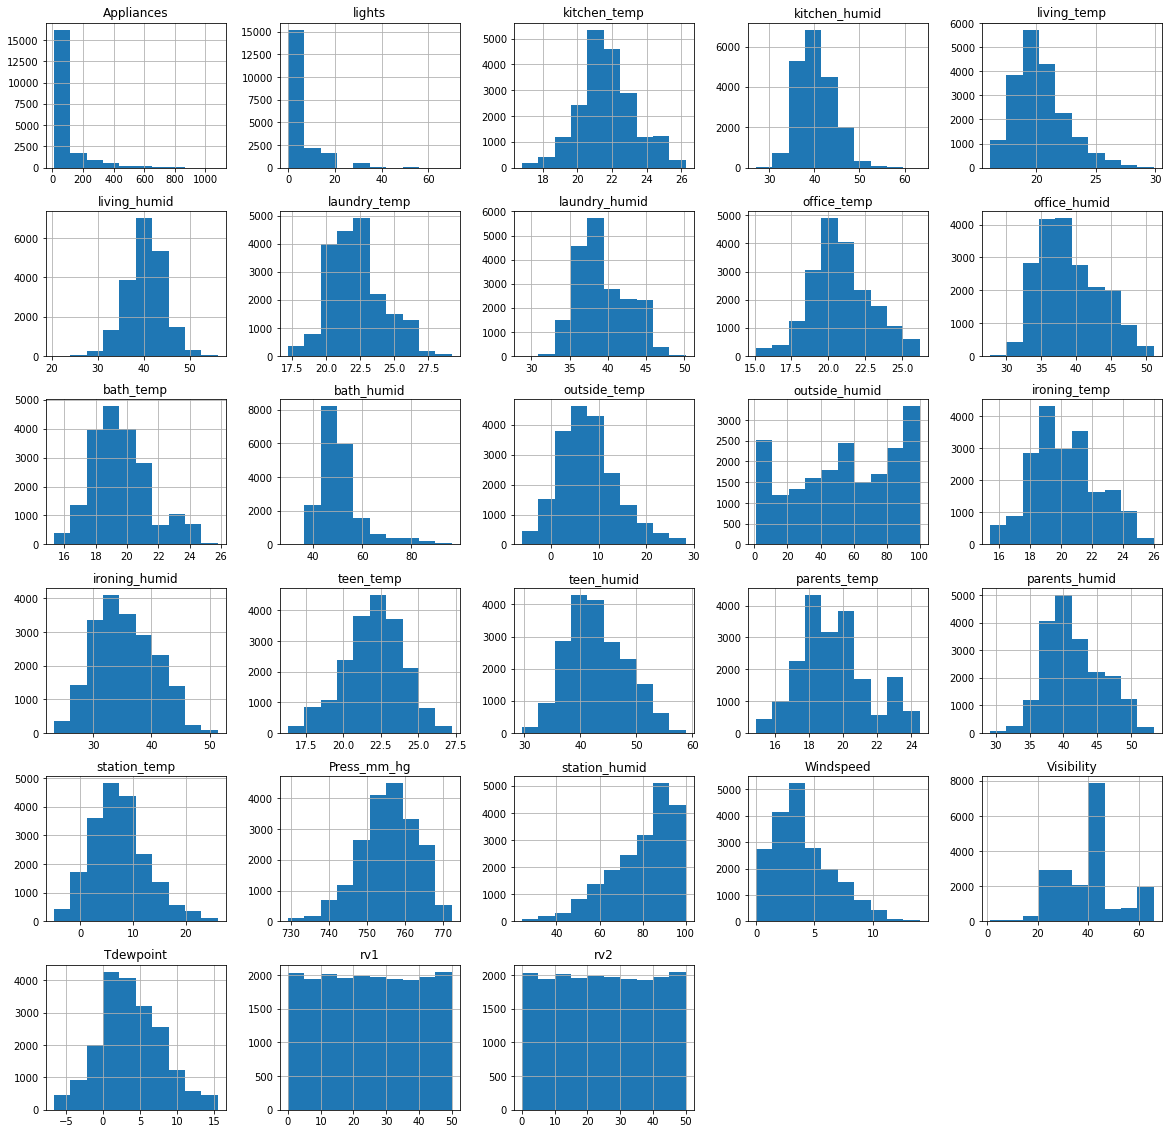

In [15]:
p = energy.hist(figsize = (20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

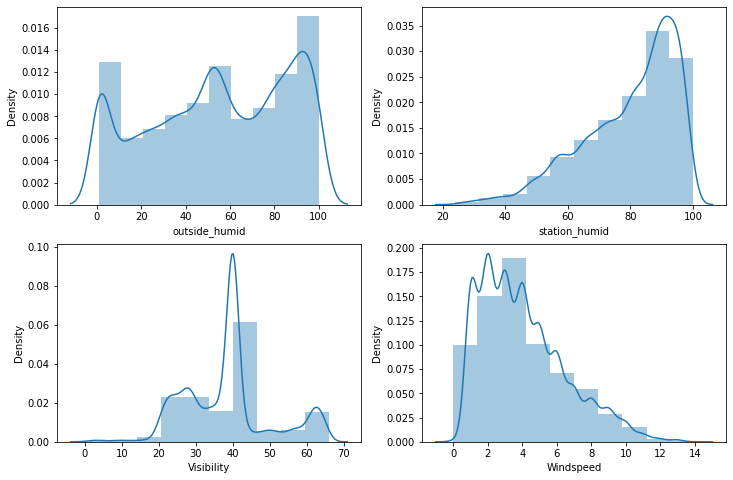

In [16]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(energy["outside_humid"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(energy["station_humid"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(energy["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(energy["Windspeed"],bins=10, ax=ax[1][1])

***Observations⚡***

***Temperature*** - All the columns follow normal distribution except T9

***Humidity*** - All columns follow normal distribution except outside_humid and station_humid, primarly because these sensors are outside the house

***Visibilty*** - This column is negatively skewed

***Windspeed*** - This column is postively skewed

In [17]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

As maximum value in lights attribute is 0, it wont be playing much role in our model. Hence we are dropping the lights attribute from our dataset.

In [18]:
energy = energy.drop('lights', axis=1)

In [19]:
energy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2'],
      dtype='object')

**Forming DataFrame**

We need to form a new DataFrame df_dateNappli with right attributes to plot graphs.

We take date and Appliances attributes into the df_dateNappli DataFrame. When we created the new DataFrame, date attribute's type has been changed to objects. Now we need to convert it back to datetime64[ns] type. Then we will set the new DataFrame's index as date.

In [20]:
df_dateNappli = pd.DataFrame({'date': energy['date'], 'Appliances': energy['Appliances']})
df_dateNappli.date=df_dateNappli.date.astype('datetime64[ns]')
df_dateNappli.set_index('date', inplace=True)

**Energy consumption**

**Appliances energy consumption measurement for the whole period**

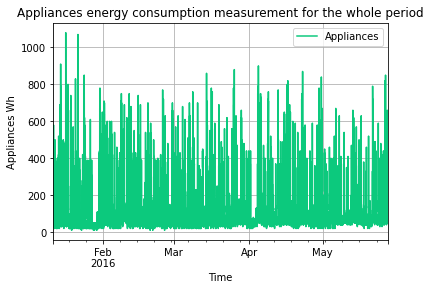

In [21]:
df_dateNappli.plot(color="#0cc97d")
plt.rcParams["figure.figsize"] = (22,10)
plt.grid()
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

Here it shows the energy consumption profile for the period. The energy consumption profile shows a high variability. We can see from here that the highest Appliances Wh is around 1100 and it was in January month. Also, we can see that, at the end of January, February and March, there were big fall down in Appliances useage.

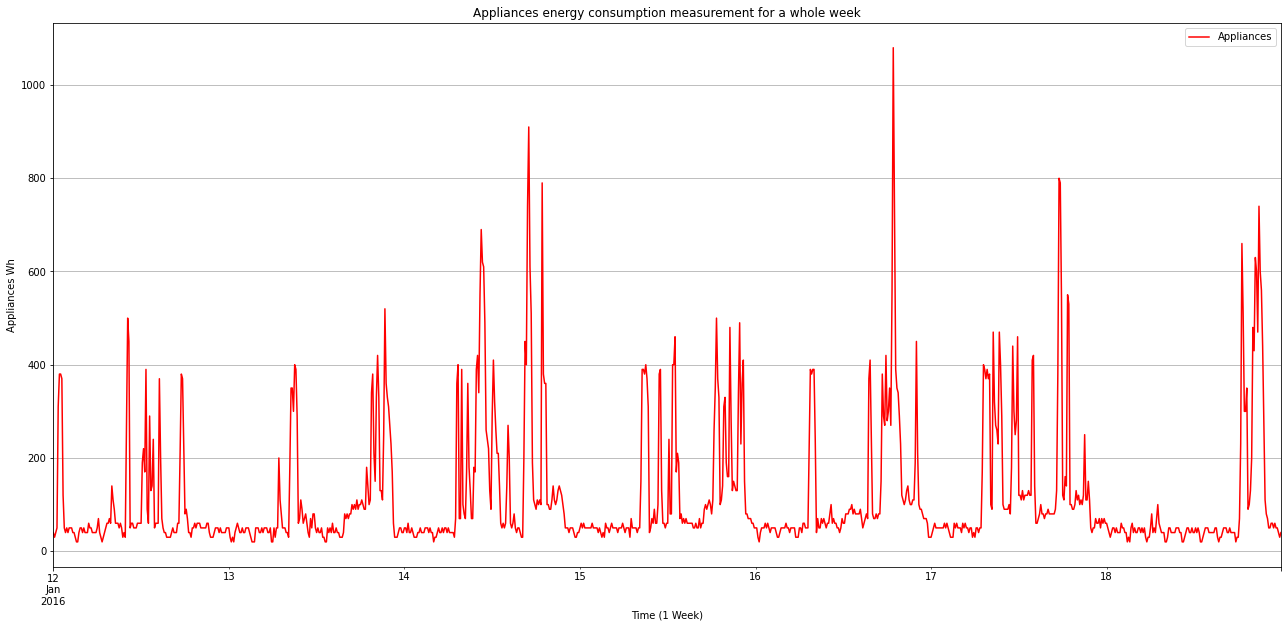

In [22]:
df_dateNappli['2016-01-12':'2016-01-18'].plot(color="red")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a whole week')
plt.grid()
plt.xlabel('Time (1 Week)')
plt.ylabel('Appliances Wh')
plt.show()

**Insights⚡**: 

Can see from here that the highest Appliances Wh is around 1100 and it was on 16th of January. Also, we can see that, it follows a bit of a pattern though it is not a strong one.

**Energy Consumption pattern of the household at different times of the day over different time periods**

In [23]:
energy['weekday'] = ((pd.to_datetime(energy['date']).dt.dayofweek)// 5 == 0).astype(int)
energy['hour'] = pd.to_datetime(energy['date']).dt.hour
energy['month'] = pd.to_datetime(energy['date']).dt.month

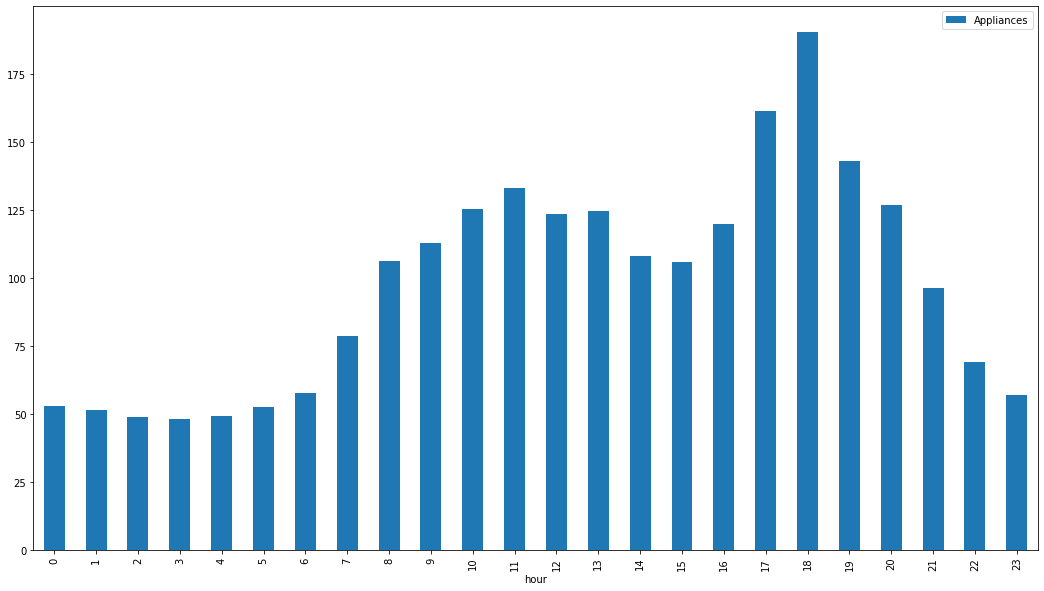

In [24]:
energy.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar()

**Insights ⚡**: Above figure is a representation of average energy consumption of appliances at different time of the day over a period of 4.5 months. We observe two peak hours. One at 11 am in the morning and other at 6 PM in the evening. While the peak at 11 am is shallow and low, peak at 6 PM is comparatively higher and sharper.

We observe that over the sleeping hours (10 PM - 6 AM) the energy consumption of appliances is around 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.

**What about weekdays and weekends?**

In [25]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation

energy['WEEKDAY'] = ((pd.to_datetime(energy['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
energy['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

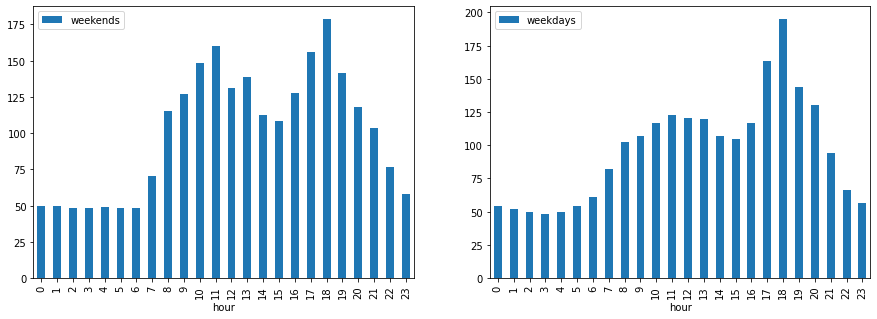

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
week_df = energy.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
week_df[week_df.weekday==0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday==1].Appliances.plot.bar(ax=ax[1], label='weekdays')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

**Insights ⚡**: We observe that the energy consumption of appliances during the 8 AM - 4 PM is higher in weekends compared to the weekdays. Also, average overall consumption in weekends is pretty high.

**Appliances energy consumption distribution. The histogram shows the frequency of energy consumption in the interval.**

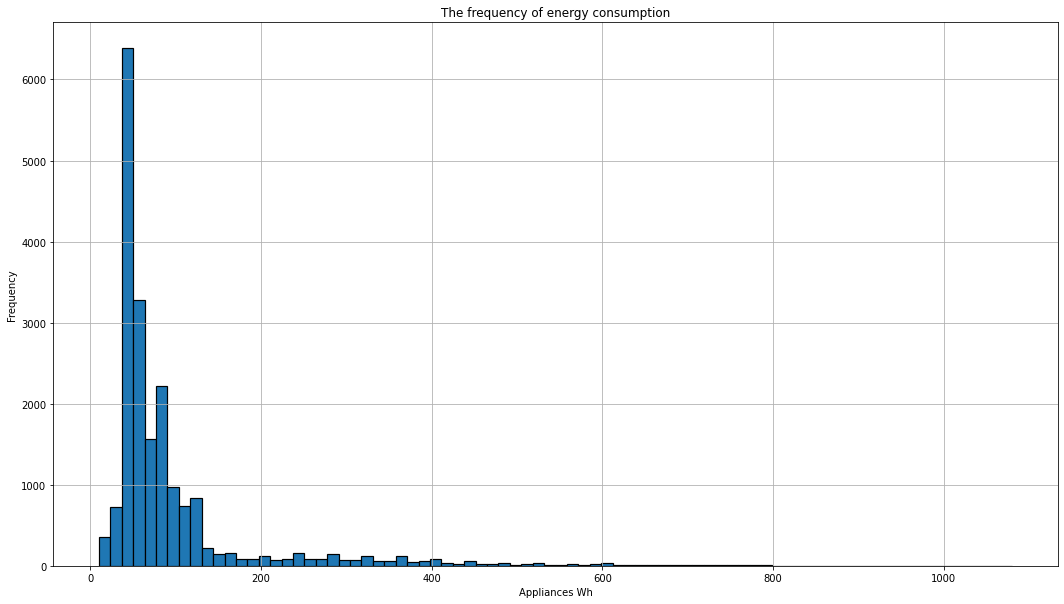

In [27]:
plt.hist(df_dateNappli.Appliances, bins=80, edgecolor='black', linewidth=1.2)
plt.rcParams["figure.figsize"] = (18,10)
plt.title('The frequency of energy consumption')
plt.grid()
plt.xlabel('Appliances Wh')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



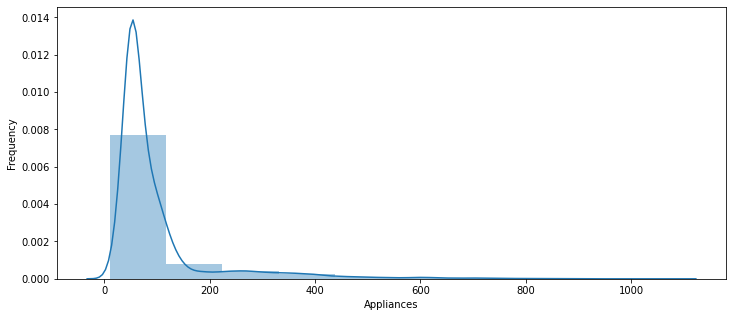

In [28]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(energy['Appliances'] , bins=10 )

In [29]:
target_var = energy['Appliances']

In [30]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_var[target_var <= 200].count()) / (len(target_var)))*100 )

Percentage of the appliance consumption is less than 200 Wh
90.29136052698252


**Insights⚡**:

1. 90% of Appliance consumption is less than 200 Wh . 

2. This column is postively skewed , most the values are around mean 100 Wh .

3. There will be outliers in this column.

4. There are small number of cases where consumption is very high.

**The boxplot shows the location of the median with the black line.**

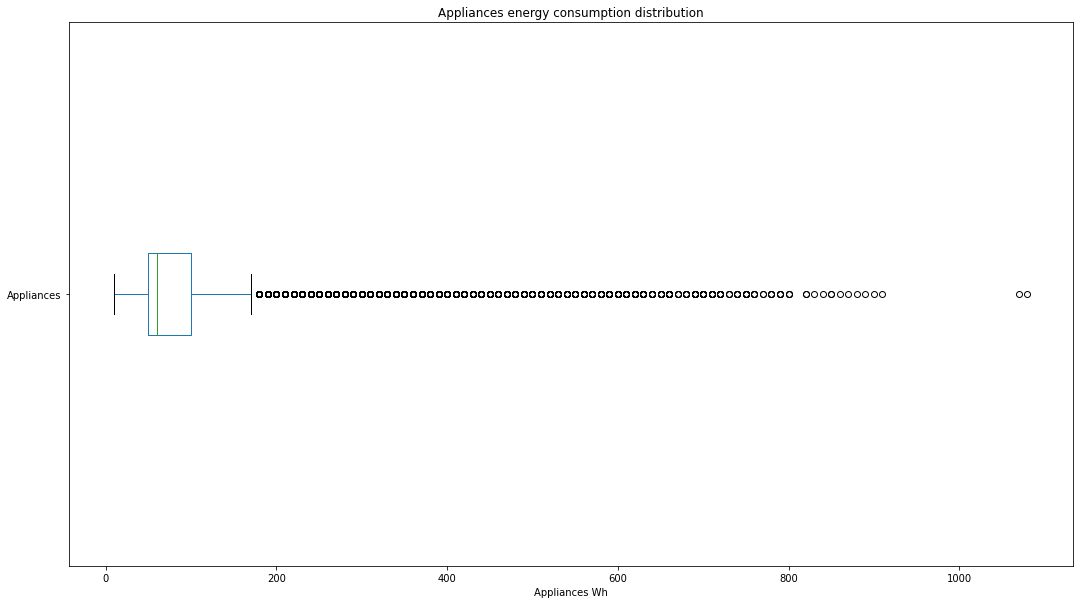

In [31]:
ax = df_dateNappli.Appliances.plot.box(vert=False)
plt.xlabel('Appliances Wh')
plt.title('Appliances energy consumption distribution')
plt.show()

In [32]:
energy[temp.values()].describe()

,kitchen_temp,living_temp,laundry_temp,office_temp,bath_temp,outside_temp,ironing_temp,teen_temp,parents_temp,station_temp
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000


**Observations**⚡:

1. Outside Average temperature over a period of 4.5 months is around 7.5 degrees and ranges from -6(min) to 28(max) degrees.

2. Inside the building avarage temperature has been around 20 degrees for all the rooms and ranges from 14(min) to 30(max) degrees.

**Note**: These points implies that warming appliances have been used to keep the insides of the building warm. There must be some sort of direct correlation b/w temperature and consumption of energy inside the house.

In [33]:
energy[humid.values()].describe()

,kitchen_humid,living_humid,laundry_humid,office_humid,bath_humid,outside_humid,ironing_humid,teen_humid,parents_humid,station_humid
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


***Observations*** :

Outside the building average humidity ***>*** average humidity inside the house.

Average humidity at the weather station ***>*** outside humidity near the building.

Average humidity in the bathroom ***>*** other rooms due to obvious reasons.

Kids and parent room show a comparatively higher average humidity.

**Exploratory data analysis**

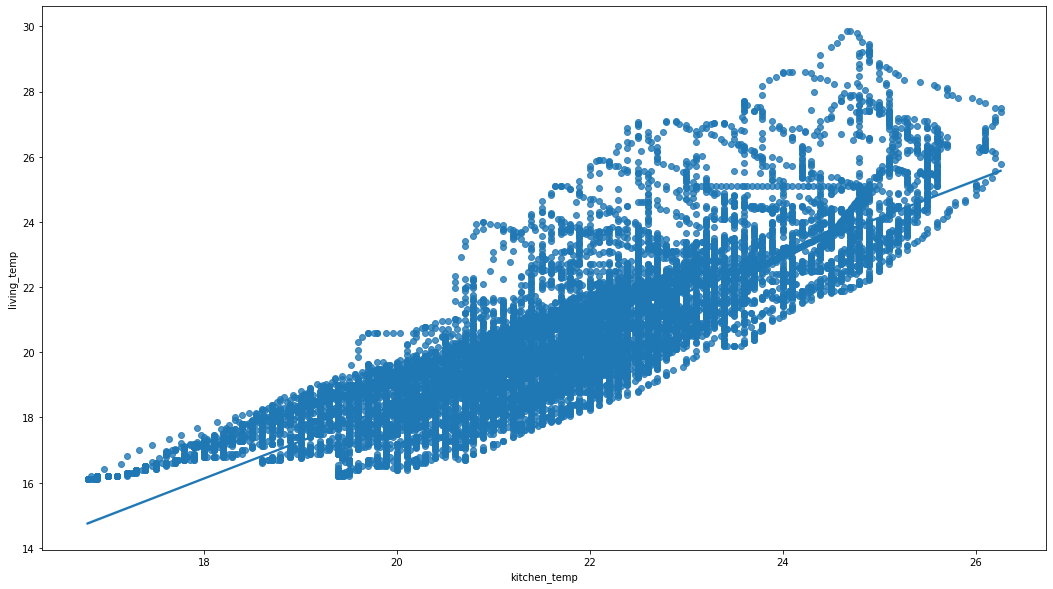

In [34]:
sns.regplot(x=energy['kitchen_temp'], y=energy['living_temp'])

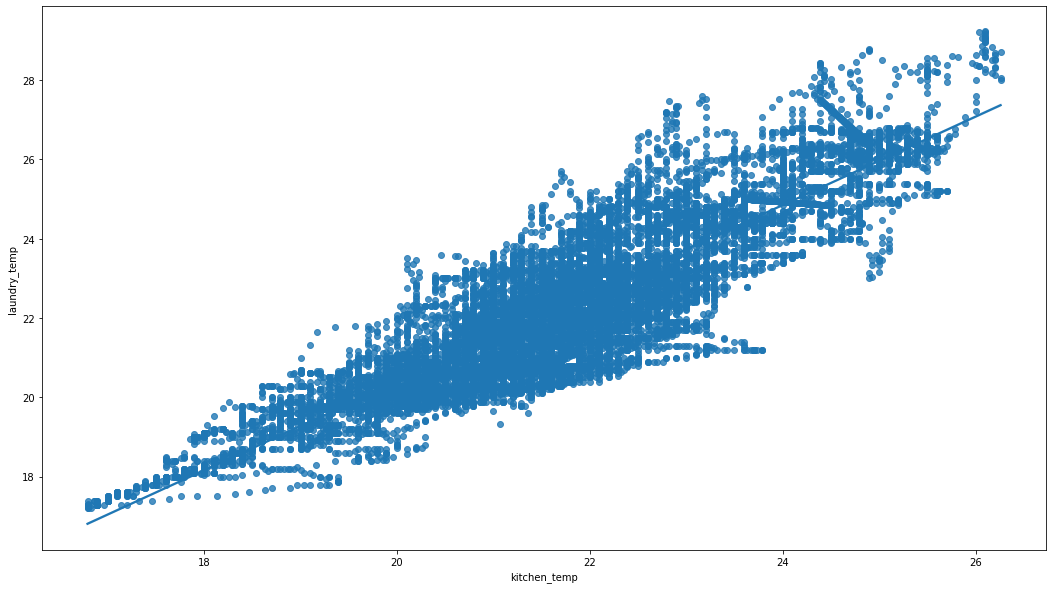

In [ ]:
sns.regplot(x=energy['kitchen_temp'], y=energy['laundry_temp'])

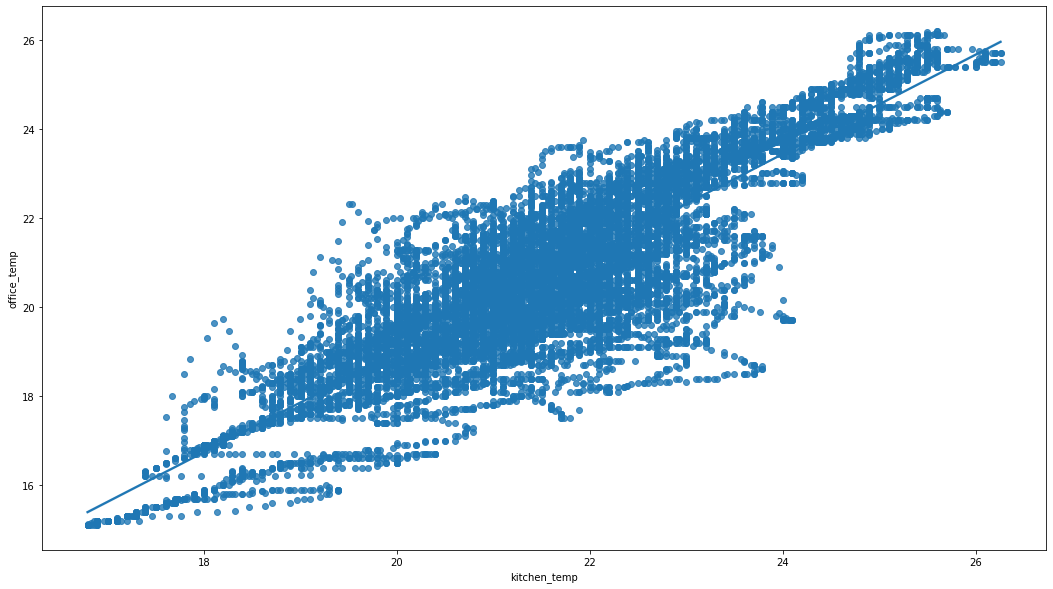

In [ ]:
sns.regplot(x=energy['kitchen_temp'], y=energy['office_temp'])

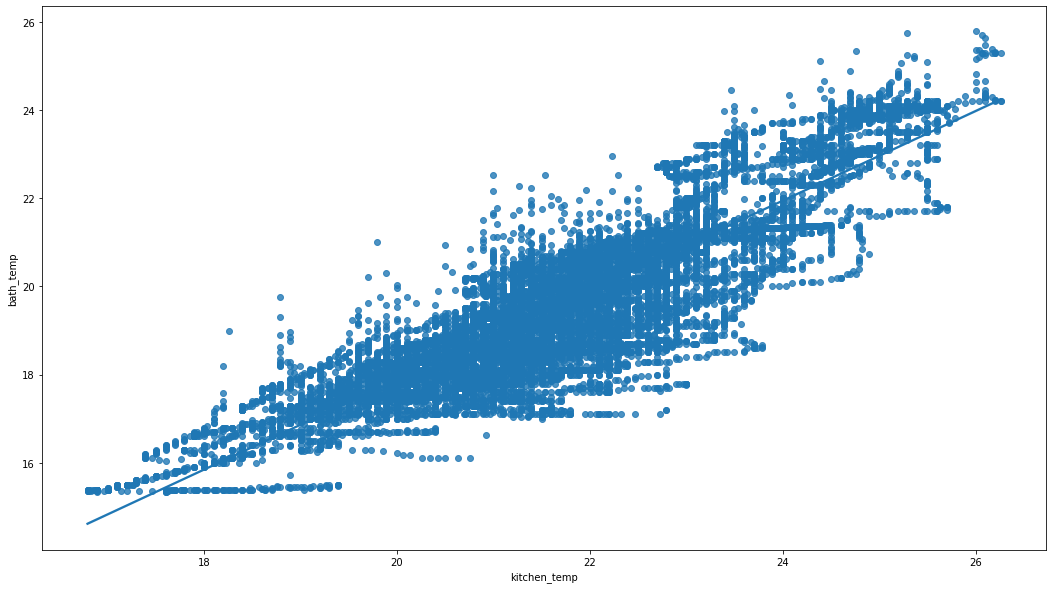

In [ ]:
sns.regplot(x=energy['kitchen_temp'], y=energy['bath_temp'])

In [35]:
from sklearn.model_selection import train_test_split

# 75% of the data is used for the training of the models and the rest is used for testing
train, test = train_test_split(energy,test_size=0.25,random_state=40)

In [36]:
train

,date,Appliances,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bath_temp,bath_humid,outside_temp,outside_humid,ironing_temp,ironing_humid,teen_temp,teen_humid,parents_temp,parents_humid,station_temp,Press_mm_hg,station_humid,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,hour,month,WEEKDAY
9544,2016-03-17 23:40:00,70,22.600,34.700000,19.500000,37.863333,21.500000,35.345000,22.890000,33.663333,19.166667,71.263333,2.863333,57.826667,21.000000,26.890000,22.890000,38.500000,19.890000,37.260000,2.233333,764.200000,87.666667,1.333333,61.000000,0.400000,43.195492,43.195492,1,23,3,0.0
19366,2016-05-25 04:40:00,50,23.700,40.290000,21.000000,42.900000,25.390000,40.000000,23.600000,39.000000,19.890000,37.900000,5.500000,39.890000,23.000000,35.090000,24.200000,43.400000,22.600000,44.590000,6.266667,757.233333,93.666667,1.000000,25.333333,5.300000,46.369677,46.369677,1,4,5,0.0
10816,2016-03-26 19:40:00,100,22.200,45.800000,20.463333,44.930000,23.000000,38.560000,20.390000,43.596667,19.856667,50.026667,13.566667,33.500000,20.890000,37.000000,23.633333,43.800000,19.963333,41.363333,13.366667,750.133333,66.333333,6.333333,40.000000,7.133333,25.722968,25.722968,0,19,3,1.0
15457,2016-04-28 01:10:00,40,21.290,35.790000,18.230000,37.863333,21.290000,34.790000,20.533333,35.326667,19.290000,59.990000,0.066667,51.160000,19.500000,29.700000,22.200000,42.950000,18.890000,35.863333,0.316667,755.216667,94.333333,2.000000,20.166667,-0.450000,3.791656,3.791656,1,1,4,0.0
2956,2016-02-01 05:40:00,50,21.290,47.400000,20.290000,47.290000,21.666667,46.760000,18.790000,49.200000,19.475556,52.175556,10.800000,99.900000,19.044444,51.025000,20.926667,57.500000,17.600000,52.900000,10.766667,758.666667,92.666667,6.666667,59.000000,9.633333,8.706206,8.706206,1,5,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,2016-03-31 19:00:00,100,21.760,41.933333,20.000000,43.163333,22.000000,38.466667,20.600000,40.700000,20.100000,48.500000,8.226667,56.326667,20.200000,33.790000,24.463333,39.693333,20.000000,38.863333,8.100000,754.800000,82.000000,2.000000,40.000000,5.200000,36.275509,36.275509,1,19,3,0.0
16065,2016-05-02 06:30:00,80,21.200,36.433333,18.000000,40.200000,22.100000,35.090000,20.260000,34.363333,19.600000,46.290000,1.730000,40.193333,19.290000,29.700000,22.290000,41.566667,19.600000,39.480000,1.750000,764.700000,92.500000,1.000000,27.500000,0.650000,37.879262,37.879262,1,6,5,0.0
14501,2016-04-21 09:50:00,50,21.600,37.466667,22.200000,35.700000,22.700000,35.700000,22.390000,34.790000,20.000000,45.433333,13.066667,6.696667,21.290000,32.290000,21.500000,39.200000,20.290000,37.900000,9.966667,762.616667,67.500000,4.000000,27.166667,4.100000,22.496162,22.496162,1,9,4,0.0
14555,2016-04-21 18:50:00,120,23.175,37.722500,22.856667,35.560000,23.290000,36.590000,22.890000,34.507500,21.166667,40.333333,18.600000,1.000000,22.238571,30.057143,22.823333,38.433333,20.200000,36.363333,17.366667,759.633333,47.500000,4.000000,38.166667,5.916667,32.362623,32.362623,1,18,4,0.0


**Lets look at correlation matrix of temperature and humidity levels**

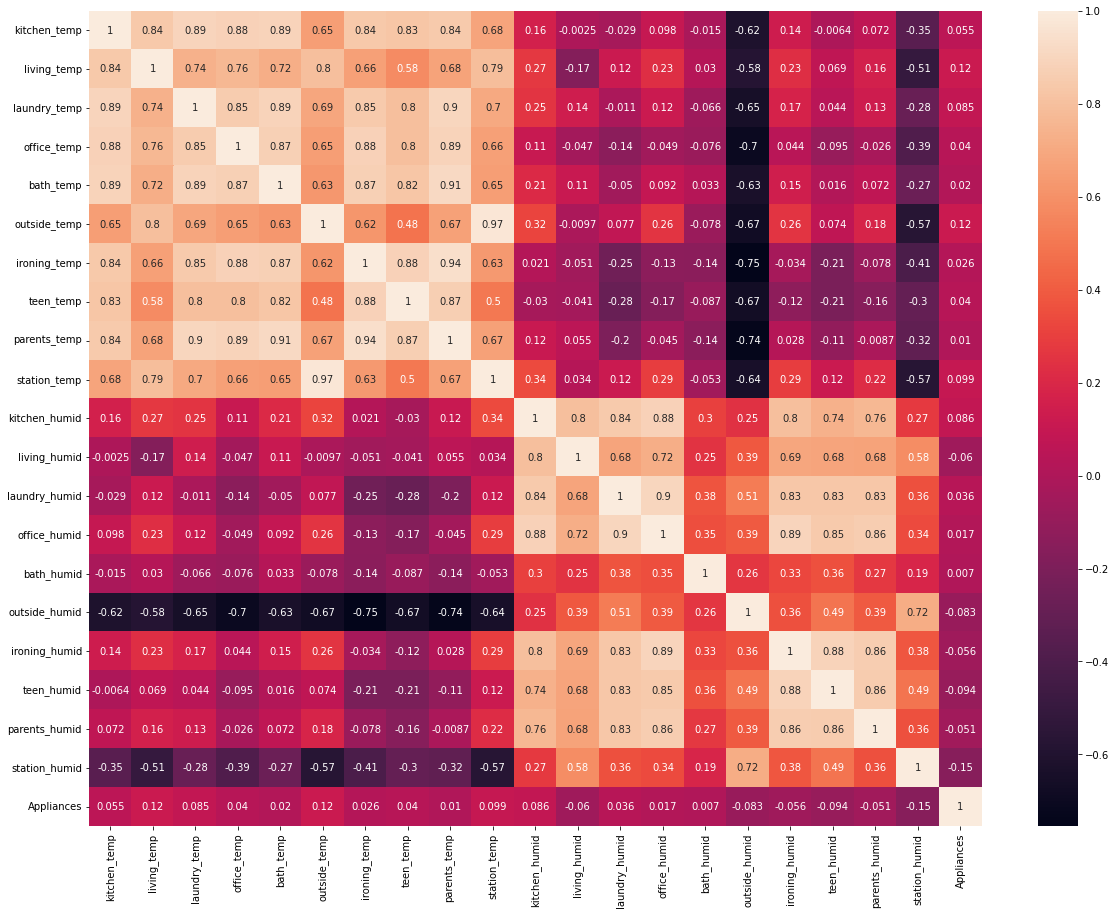

In [37]:
cols = list(temp.values())
cols.extend(list(humid.values()))
cols.extend(['Appliances'])
fig, ax = plt.subplots(1,1,figsize=(20,15))
sns.heatmap(energy[cols].corr(), ax=ax, annot=True)

***OBSERVATIONS*** ⚡:

1. From the correlation graph we clearly observe that the features related to temperature and features related to humidity have positive correlation within themselves whereas have a a very low or negative correlation with each other.

2. Humidity outside have a strong negative correlation with temperature levels.

3. Apart from that we observe that a couple features such as humidity at station, temperature outside the building and temperature in the living room have a comparatively high absolute correlation (above 0.12) with Appliances energy consumption.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [39]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential, layers, Input

In [40]:
warnings.filterwarnings('ignore')

In [ ]:
# from sklearn.model_selection import train_test_split

# # 75% of the data is usedfor the training of the models and the rest is used for testing
# train, test = train_test_split(energy,test_size=0.25,random_state=40)

In [41]:
test.shape

(4934, 32)

## ***Data Pre Processing***

**Given this is not a timeseries problem and we will focus on predicting the appliance consumption , we can ignore Date column.**

In [42]:
humid.values()

dict_values(['kitchen_humid', 'living_humid', 'laundry_humid', 'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid', 'teen_humid', 'parents_humid', 'station_humid'])

In [43]:
temp.values()

dict_values(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp', 'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp', 'parents_temp', 'station_temp'])

In [44]:
energy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2', 'weekday', 'hour', 'month', 'WEEKDAY'],
      dtype='object')

In [46]:
# Divide the columns based on type for clear column management 

col_temp = ['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp', 'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp', 'parents_temp']

col_hum = ['kitchen_humid', 'living_humid', 'laundry_humid', 'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid', 'teen_humid', 'parents_humid']

col_weather = ['station_temp', 'Tdewpoint','station_humid',"Press_mm_hg",
                "Windspeed","Visibility"] 

col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [47]:
#Split training dataset into independent and dependent varibales
X_train = train[col_temp + col_hum + col_weather]
y_train = train[col_target]

In [48]:
X_train

,kitchen_temp,living_temp,laundry_temp,office_temp,bath_temp,outside_temp,ironing_temp,teen_temp,parents_temp,kitchen_humid,living_humid,laundry_humid,office_humid,bath_humid,outside_humid,ironing_humid,teen_humid,parents_humid,station_temp,Tdewpoint,station_humid,Press_mm_hg,Windspeed,Visibility
9544,22.600,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,19.890000,34.700000,37.863333,35.345000,33.663333,71.263333,57.826667,26.890000,38.500000,37.260000,2.233333,0.400000,87.666667,764.200000,1.333333,61.000000
19366,23.700,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,22.600000,40.290000,42.900000,40.000000,39.000000,37.900000,39.890000,35.090000,43.400000,44.590000,6.266667,5.300000,93.666667,757.233333,1.000000,25.333333
10816,22.200,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,19.963333,45.800000,44.930000,38.560000,43.596667,50.026667,33.500000,37.000000,43.800000,41.363333,13.366667,7.133333,66.333333,750.133333,6.333333,40.000000
15457,21.290,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,18.890000,35.790000,37.863333,34.790000,35.326667,59.990000,51.160000,29.700000,42.950000,35.863333,0.316667,-0.450000,94.333333,755.216667,2.000000,20.166667
2956,21.290,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,17.600000,47.400000,47.290000,46.760000,49.200000,52.175556,99.900000,51.025000,57.500000,52.900000,10.766667,9.633333,92.666667,758.666667,6.666667,59.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,21.760,20.000000,22.000000,20.600000,20.100000,8.226667,20.200000,24.463333,20.000000,41.933333,43.163333,38.466667,40.700000,48.500000,56.326667,33.790000,39.693333,38.863333,8.100000,5.200000,82.000000,754.800000,2.000000,40.000000
16065,21.200,18.000000,22.100000,20.260000,19.600000,1.730000,19.290000,22.290000,19.600000,36.433333,40.200000,35.090000,34.363333,46.290000,40.193333,29.700000,41.566667,39.480000,1.750000,0.650000,92.500000,764.700000,1.000000,27.500000
14501,21.600,22.200000,22.700000,22.390000,20.000000,13.066667,21.290000,21.500000,20.290000,37.466667,35.700000,35.700000,34.790000,45.433333,6.696667,32.290000,39.200000,37.900000,9.966667,4.100000,67.500000,762.616667,4.000000,27.166667
14555,23.175,22.856667,23.290000,22.890000,21.166667,18.600000,22.238571,22.823333,20.200000,37.722500,35.560000,36.590000,34.507500,40.333333,1.000000,30.057143,38.433333,36.363333,17.366667,5.916667,47.500000,759.633333,4.000000,38.166667


In [49]:
#Split testing dataset into independent and dependent varibales
X_test = test[col_temp + col_hum + col_weather]
y_test = test[col_target]

In [50]:
X_train.columns

Index(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp',
       'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp',
       'parents_temp', 'kitchen_humid', 'living_humid', 'laundry_humid',
       'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid',
       'teen_humid', 'parents_humid', 'station_temp', 'Tdewpoint',
       'station_humid', 'Press_mm_hg', 'Windspeed', 'Visibility'],
      dtype='object')

In [51]:
X_test.columns

Index(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp',
       'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp',
       'parents_temp', 'kitchen_humid', 'living_humid', 'laundry_humid',
       'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid',
       'teen_humid', 'parents_humid', 'station_temp', 'Tdewpoint',
       'station_humid', 'Press_mm_hg', 'Windspeed', 'Visibility'],
      dtype='object')

In [52]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [54]:
X_train = pd.DataFrame(X_train,columns = train[col_temp + col_hum + col_weather].columns)

In [55]:
X_test = pd.DataFrame(X_test,columns = test[col_temp + col_hum + col_weather].columns)

In [56]:
y_train.shape,X_test.shape,X_train.shape,y_test.shape

((14801,), (4934, 24), (14801, 24), (4934,))

In [53]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

# ***Model Implementation***

We will be looking at following Algorithms

⚡***Improved Linear regression models***

1.Ridge regression

2.Lasso regression

⚡***Support Vector Machine***

3.Support vector regression

⚡***Nearest neighbour Regressor***

4.KNeighborsRegressor

⚡***Ensemble models***

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# regressor.intercept_
# regressor.coef_

LinearRegression()

In [60]:
regressor.intercept_

-2.662206308525692e-15

In [61]:
y_pred=regressor.predict(X_test)
r2_score(y_test, y_pred)

0.13475556547191114

In [62]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.9155375720644787

In [63]:
regressor.coef_

array([-0.00296823, -0.46008951,  0.50348801,  0.06616112, -0.01218331,
        0.45531222,  0.00205589,  0.21893972, -0.41526965,  0.62488674,
       -0.59647718,  0.16774734,  0.1018053 ,  0.01519432,  0.08833811,
       -0.06806866, -0.30868589, -0.06085231, -0.51066166,  0.15865594,
       -0.11326963,  0.01135919,  0.05298214,  0.02301275])

['***kitchen_temp***', 'living_temp', 'laundry_temp', '***office_temp***',
      '***bath_temp***', 'outside_temp', '***ironing_temp***', 'teen_temp',
       'parents_temp', 'kitchen_humid', 'living_humid', 'laundry_humid',
       'office_humid', '***bath_humid***', '***outside_humid***', '***ironing_humid***',
       'teen_humid', '***parents_humid***', 'station_temp', 'Tdewpoint',
       'station_humid', '***Press_mm_hg***', '***Windspeed***', '***Visibility***'], 
     

In [79]:
Dr=['living_temp', 'laundry_temp', 'outside_temp', 'teen_temp', 'parents_temp',
'kitchen_humid', 'living_humid', 'laundry_humid', 'office_humid', 'teen_humid','station_temp', 'Tdewpoint', 'station_humid']

In [80]:
df_new=energy[Dr]

In [81]:
X1=df_new
y1=energy['Appliances']

In [82]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25)

In [83]:
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

LinearRegression()

In [84]:
y_pred1=regressor1.predict(X_test1)
r2_score(y_test1, y_pred1)

0.14137242653951054

In [85]:
math.sqrt(mean_squared_error(y_test1, y_pred1))

97.33061925111265

In [86]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [87]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
         ]

In [76]:
# Run all the proposed models and update the information in a list model_data

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train1,y_train1)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train1,curr_model.predict(X_train1))
    curr_model_data["Test_R2_Score"] = r2_score(y_test1,curr_model.predict(X_test1))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test1,curr_model.predict(X_test1)))
    model_data.append(curr_model_data)

[08:54:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [88]:
results_df = df = pd.DataFrame(model_data)

In [89]:
results_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.049192,0.135016,0.140716,96.622075
1,Ridge:,0.004479,0.138078,0.144659,96.400156
2,KNeighborsRegressor:,0.033540,0.647645,0.390903,81.348802
3,SVR:,13.272695,-0.062022,-0.070719,107.856339
4,RandomForest,14.810946,0.933295,0.518005,72.365144
5,ExtraTreeRegressor :,4.241418,1.000000,0.587149,66.973787
6,GradientBoostingClassifier:,3.865356,0.297232,0.229785,91.477431
7,XGBRegressor:,1.035059,0.290584,0.231564,91.371749


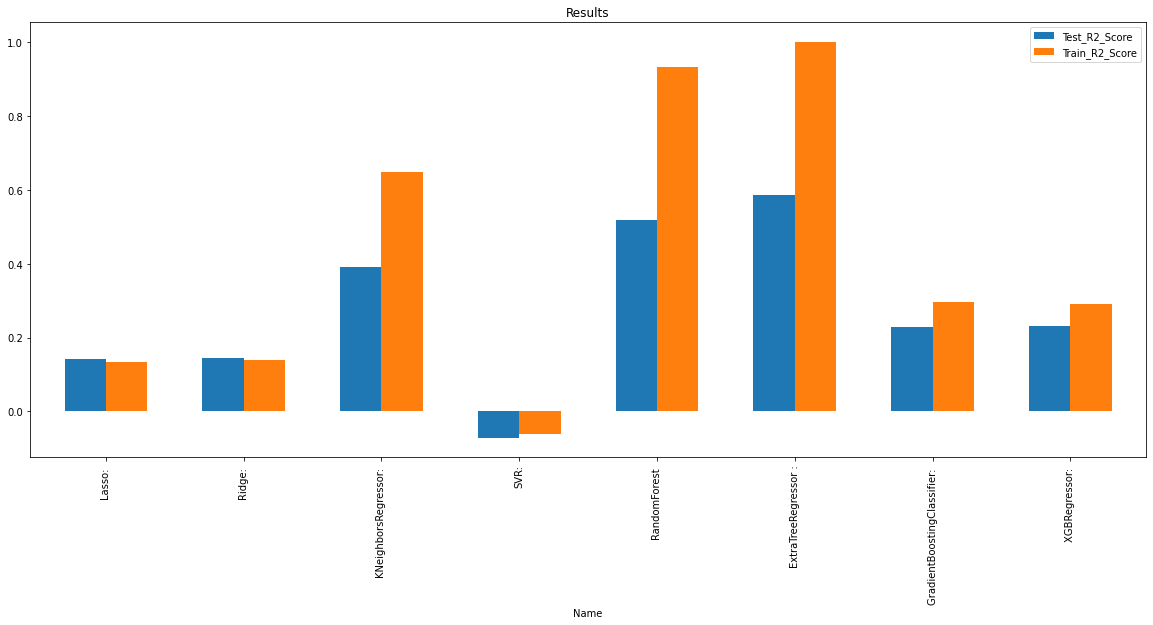

In [91]:
results_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score'], title = 'Results' , width = .6, figsize= (20,8))

***Obervations***⚡

1. Best results over test set are given by Extra Tree Regressor with R2 score. of 0.59

2. Least RMSE score is also by Extra Tree Regressor 66.97.

3. SVR was worst performing model.

In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto","sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train1, y_train1)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [102]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200}

In [103]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(X_train1,y_train1)

0.9999991891897427

In [104]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(X_test1,y_test1)

0.581816430831212

In [105]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(y_test1, grid_search.best_estimator_.predict(X_test1)))

67.9251417623579

In [106]:
results_df_after_grid = df = pd.DataFrame(model_data)

In [107]:
results_df_after_grid

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.049192,0.135016,0.140716,96.622075
1,Ridge:,0.004479,0.138078,0.144659,96.400156
2,KNeighborsRegressor:,0.033540,0.647645,0.390903,81.348802
3,SVR:,13.272695,-0.062022,-0.070719,107.856339
4,RandomForest,14.810946,0.933295,0.518005,72.365144
5,ExtraTreeRegressor :,4.241418,1.000000,0.587149,66.973787
6,GradientBoostingClassifier:,3.865356,0.297232,0.229785,91.477431
7,XGBRegressor:,1.035059,0.290584,0.231564,91.371749


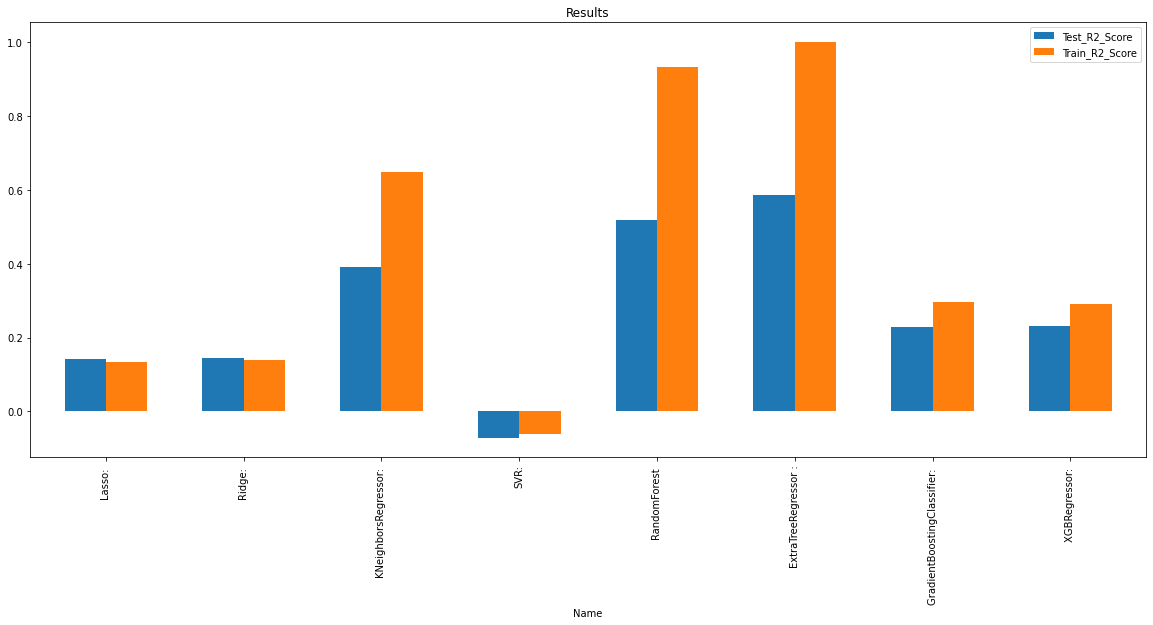

In [108]:
results_df_after_grid.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score'], title = 'Results' , width = .6, figsize= (20,8))

***Observations⚡*** :

Based on parameter tunning step we can see that for Extra Tree Regressor

Best possible parameter combination are - 'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200

Training set R2 score of 1.0 may be signal of overfitting on training set

Test set R2 score is 0.63 improvement over 0.57 achieved using untuned model

Test set RMSE score is 0.60 improvement over 0.65 achieved using untuned model

In [109]:
X_train.columns

Index(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp',
       'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp',
       'parents_temp', 'kitchen_humid', 'living_humid', 'laundry_humid',
       'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid',
       'teen_humid', 'parents_humid', 'station_temp', 'Tdewpoint',
       'station_humid', 'Press_mm_hg', 'Windspeed', 'Visibility'],
      dtype='object')

In [110]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

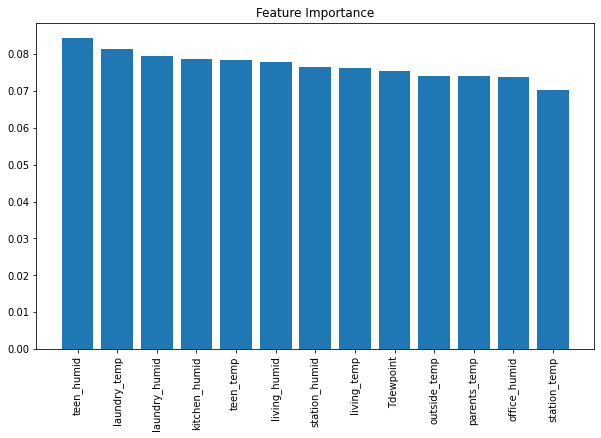

In [112]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train1.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train1.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train1.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [113]:
# Get top 5 most important feature 
names[0:5]

['teen_humid', 'laundry_temp', 'laundry_humid', 'kitchen_humid', 'teen_temp']

In [114]:
# Get 5 least important feature 
names[-5:]

['Tdewpoint', 'outside_temp', 'parents_temp', 'office_humid', 'station_temp']

In [115]:
# Reduce test & training set to 5 feature set
train_important_feature = X_train1[names[0:5]]
test_important_feature = X_test1[names[0:5]]

In [116]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , y_train1)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=200,
                    random_state=40)

In [117]:
# Reduced dataset scores 

print('Training set R2 Score - ', r2_score(y_train1,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', r2_score(y_test1,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(y_test1, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9996162842882343
Testing set R2 Score -  0.47584030205051564
Testing set RMSE Score -  76.04643924935203


***Observations***⚡:

Based on parameter tunning step we can see that

a. 5 most important features are - ['teen_humid','laundry_temp','station_humid','kitchen_humid','laundry_humid']


b. 5 least important features are - ['bath_temp','ironing_temp','kitchen_temp','parents_temp','Visibility']

As can be observed with R2 Score , compared to Tuned model 0.63 the R2 score has come down to 0.48 which is increase of 25%.
The reduction in R2 score is high and we should not use reduced feature set for this data set

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train1, y_train1)

RandomForestRegressor()

In [121]:
y_pred2 = rf.predict(X_test1)

In [122]:
r2_score(y_test1,y_pred2)

0.4923892897023572

In [123]:
rf.feature_importances_

array([0.07201564, 0.08491817, 0.06295897, 0.08139922, 0.06009717,
       0.09023615, 0.09309428, 0.09359608, 0.07255819, 0.09568144,
       0.05464482, 0.0605869 , 0.07821295])

Text(0.5, 0, 'Random Forest Feature Importance')

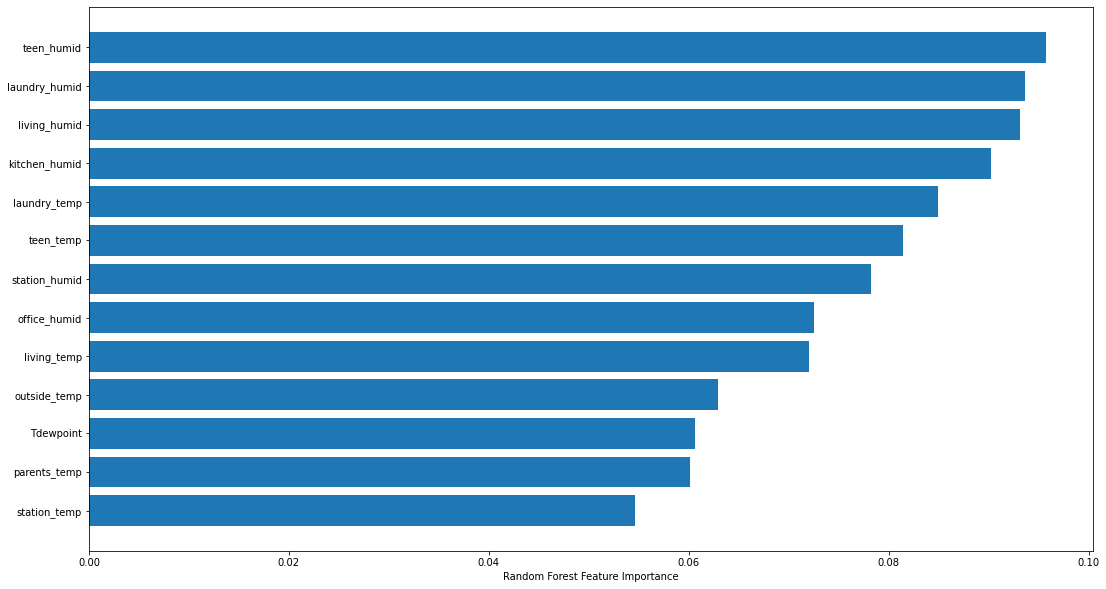

In [124]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train1.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## **Multicollinearity**

In [ ]:
# Let us work on removing Multicollinearity and selecting relevant Features
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Let us create a copy of the dataset

energy_copy = energy.copy()

In [ ]:
energy_copy.head()

,date,Appliances,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bath_temp,bath_humid,outside_temp,outside_humid,ironing_temp,ironing_humid,teen_temp,teen_humid,parents_temp,parents_humid,station_temp,Press_mm_hg,station_humid,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,hour,month,WEEKDAY
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,17,1,0.0
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,17,1,0.0
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,17,1,0.0
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,17,1,0.0
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,17,1,0.0


In [ ]:
energy_copy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2', 'weekday', 'hour', 'month', 'WEEKDAY'],
      dtype='object')

In [ ]:
# We do not need 'weekday', 'hour', 'month', 'WEEKDAY'
# Let us drop them
energy_copy = energy_copy.drop(['weekday', 'hour', 'month', 'WEEKDAY'], axis=1)

In [ ]:
energy_copy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Let us calculate the VIF for variables
calc_vif(energy_copy[[i for i in energy_copy.describe().columns if i not in ['Appliances']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning:

divide by zero encountered in double_scalars



,variables,VIF
0,kitchen_temp,3603.955627
1,kitchen_humid,1638.935566
2,living_temp,2490.023473
3,living_humid,2163.849100
4,laundry_temp,1239.191589
5,laundry_humid,1567.810560
6,office_temp,932.769026
7,office_humid,1357.805623
8,bath_temp,1187.570988
9,bath_humid,45.083892


Let us write a function for calculating heat index.

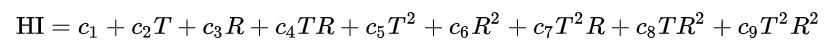

The following coefficients can be used to determine the heat index when the temperature is given in degrees Celsius, where

HI = heat index (in degrees Celsius)

T = ambient dry-bulb temperature (in degrees Celsius)

R = humidity (percentage value between 0 and 100)

c1 = -8.78469475556

c2 = 1.61139411

c3 = 2.33854883889

c4 = -0.14611605

c5 = -0.012308094

c6 = -0.0164248277778

c7 = 0.002211732

c8 = 0.00072546

c9 = -0.000003582

In [ ]:
c1 = -8.78469475556
c2 = 1.61139411
c3 = 2.33854883889
c4 = -0.14611605
c5 = -0.012308094
c6 = -0.0164248277778
c7 = 0.002211732
c8 = 0.00072546
c9 = -0.000003582

In [ ]:
# Let us merge kitchen_temp & kitchen_humid to kitchen_feel
energy_copy["kitchen_feel"] = (c1+(c2*energy_copy["kitchen_temp"])+
                              (c3*energy_copy["kitchen_humid"])
                              + (c4*energy_copy["kitchen_temp"]*energy_copy["kitchen_humid"])
                              + (c5*(energy_copy["kitchen_temp"]**2))
                              + (c6*(energy_copy["kitchen_humid"]**2)) 
                              + (c7*(energy_copy["kitchen_temp"]**2)*energy_copy["kitchen_humid"])
                              + (c8*energy_copy["kitchen_temp"]*(energy_copy["kitchen_humid"]**2))
                              + (c9*(energy_copy["kitchen_temp"]**2)*(energy_copy["kitchen_humid"]**2))
                              )

In [ ]:
energy_copy.head()

,date,Appliances,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bath_temp,bath_humid,outside_temp,outside_humid,ironing_temp,ironing_humid,teen_temp,teen_humid,parents_temp,parents_humid,station_temp,Press_mm_hg,station_humid,Windspeed,Visibility,Tdewpoint,rv1,rv2,kitchen_feel
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,25.291766
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,25.304843
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,25.308797
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,25.310644
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,25.308503


In [ ]:
# Let us merge living_temp & living_humid to living_feel
energy_copy["living_feel"] = (c1+(c2*energy_copy["living_temp"])+
                              (c3*energy_copy["living_humid"])
                              + (c4*energy_copy["living_temp"]*energy_copy["living_humid"])
                              + (c5*(energy_copy["living_temp"]**2))
                              + (c6*(energy_copy["living_humid"]**2)) 
                              + (c7*(energy_copy["living_temp"]**2)*energy_copy["living_humid"])
                              + (c8*energy_copy["living_temp"]*(energy_copy["living_humid"]**2))
                              + (c9*(energy_copy["living_temp"]**2)*(energy_copy["living_humid"]**2))
                              )

In [ ]:
# Let us merge laundry_temp & laundry_humid to laundry_feel
energy_copy["laundry_feel"] = (c1+(c2*energy_copy["laundry_temp"])+
                              (c3*energy_copy["laundry_humid"])
                              + (c4*energy_copy["laundry_temp"]*energy_copy["laundry_humid"])
                              + (c5*(energy_copy["laundry_temp"]**2))
                              + (c6*(energy_copy["laundry_humid"]**2)) 
                              + (c7*(energy_copy["laundry_temp"]**2)*energy_copy["laundry_humid"])
                              + (c8*energy_copy["laundry_temp"]*(energy_copy["laundry_humid"]**2))
                              + (c9*(energy_copy["laundry_temp"]**2)*(energy_copy["laundry_humid"]**2))
                              )

In [ ]:
# Let us merge office_temp & office_humid to office_feel
energy_copy["office_feel"] = (c1+(c2*energy_copy["office_temp"])+
                              (c3*energy_copy["office_humid"])
                              + (c4*energy_copy["office_temp"]*energy_copy["office_humid"])
                              + (c5*(energy_copy["office_temp"]**2))
                              + (c6*(energy_copy["office_humid"]**2)) 
                              + (c7*(energy_copy["office_temp"]**2)*energy_copy["office_humid"])
                              + (c8*energy_copy["office_temp"]*(energy_copy["office_humid"]**2))
                              + (c9*(energy_copy["office_temp"]**2)*(energy_copy["office_humid"]**2))
                              )

In [ ]:
# Let us merge bath_temp & bath_humid to bath_feel
energy_copy["bath_feel"] = (c1+(c2*energy_copy["bath_temp"])+
                              (c3*energy_copy["bath_humid"])
                              + (c4*energy_copy["bath_temp"]*energy_copy["bath_humid"])
                              + (c5*(energy_copy["bath_temp"]**2))
                              + (c6*(energy_copy["bath_humid"]**2)) 
                              + (c7*(energy_copy["bath_temp"]**2)*energy_copy["bath_humid"])
                              + (c8*energy_copy["bath_temp"]*(energy_copy["bath_humid"]**2))
                              + (c9*(energy_copy["bath_temp"]**2)*(energy_copy["bath_humid"]**2))
                              )

In [ ]:
# Let us merge outside_temp & outside_humid to outside_feel
energy_copy["outside_feel"] = (c1+(c2*energy_copy["outside_temp"])+
                              (c3*energy_copy["outside_humid"])
                              + (c4*energy_copy["outside_temp"]*energy_copy["outside_humid"])
                              + (c5*(energy_copy["outside_temp"]**2))
                              + (c6*(energy_copy["outside_humid"]**2)) 
                              + (c7*(energy_copy["outside_temp"]**2)*energy_copy["outside_humid"])
                              + (c8*energy_copy["outside_temp"]*(energy_copy["outside_humid"]**2))
                              + (c9*(energy_copy["outside_temp"]**2)*(energy_copy["outside_humid"]**2))
                              )

In [ ]:
# Let us merge ironing_temp & ironing_humid to ironing_feel
energy_copy["ironing_feel"] = (c1+(c2*energy_copy["ironing_temp"])+
                              (c3*energy_copy["ironing_humid"])
                              + (c4*energy_copy["ironing_temp"]*energy_copy["ironing_humid"])
                              + (c5*(energy_copy["ironing_temp"]**2))
                              + (c6*(energy_copy["ironing_humid"]**2)) 
                              + (c7*(energy_copy["ironing_temp"]**2)*energy_copy["ironing_humid"])
                              + (c8*energy_copy["ironing_temp"]*(energy_copy["ironing_humid"]**2))
                              + (c9*(energy_copy["ironing_temp"]**2)*(energy_copy["ironing_humid"]**2))
                              )

In [ ]:
# Let us merge teen_temp & teen_humid to teen_feel
energy_copy["teen_feel"] = (c1+(c2*energy_copy["teen_temp"])+
                              (c3*energy_copy["teen_humid"])
                              + (c4*energy_copy["teen_temp"]*energy_copy["teen_humid"])
                              + (c5*(energy_copy["teen_temp"]**2))
                              + (c6*(energy_copy["teen_humid"]**2)) 
                              + (c7*(energy_copy["teen_temp"]**2)*energy_copy["teen_humid"])
                              + (c8*energy_copy["teen_temp"]*(energy_copy["teen_humid"]**2))
                              + (c9*(energy_copy["teen_temp"]**2)*(energy_copy["teen_humid"]**2))
                              )

In [ ]:
# Let us merge parents_temp & parents_humid to parents_feel
energy_copy["parents_feel"] = (c1+(c2*energy_copy["parents_temp"])+
                              (c3*energy_copy["parents_humid"])
                              + (c4*energy_copy["parents_temp"]*energy_copy["parents_humid"])
                              + (c5*(energy_copy["parents_temp"]**2))
                              + (c6*(energy_copy["parents_humid"]**2)) 
                              + (c7*(energy_copy["parents_temp"]**2)*energy_copy["parents_humid"])
                              + (c8*energy_copy["parents_temp"]*(energy_copy["parents_humid"]**2))
                              + (c9*(energy_copy["parents_temp"]**2)*(energy_copy["parents_humid"]**2))
                              )

In [ ]:
# Let us merge station_temp & station_humid to station_feel
energy_copy["station_feel"] = (c1+(c2*energy_copy["station_temp"])+
                              (c3*energy_copy["station_humid"])
                              + (c4*energy_copy["station_temp"]*energy_copy["station_humid"])
                              + (c5*(energy_copy["station_temp"]**2))
                              + (c6*(energy_copy["station_humid"]**2)) 
                              + (c7*(energy_copy["station_temp"]**2)*energy_copy["station_humid"])
                              + (c8*energy_copy["station_temp"]*(energy_copy["station_humid"]**2))
                              + (c9*(energy_copy["station_temp"]**2)*(energy_copy["station_humid"]**2))
                              )

In [ ]:
energy_copy.head()

,date,Appliances,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bath_temp,bath_humid,outside_temp,outside_humid,ironing_temp,ironing_humid,teen_temp,teen_humid,parents_temp,parents_humid,station_temp,Press_mm_hg,station_humid,Windspeed,Visibility,Tdewpoint,rv1,rv2,kitchen_feel,living_feel,laundry_feel,office_feel,bath_feel,outside_feel,ironing_feel,teen_feel,parents_feel,station_feel
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,25.291766,25.567674,25.346069,25.659433,26.540775,39.992728,26.581827,26.064899,26.878495,36.788294
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,25.304843,25.567213,25.346214,25.659675,26.540775,40.767003,26.577615,26.065599,26.853384,37.206718
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,25.308797,25.566499,25.346459,25.694185,26.548737,42.194263,26.569489,26.068044,26.903746,37.629521
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,25.310644,25.566207,25.346524,25.711522,26.548737,42.520584,26.605550,26.133269,26.900975,38.056703
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,25.308503,25.565707,25.346524,25.710999,26.520549,42.008438,26.556108,26.133269,26.900975,38.488263


In [ ]:
energy_copy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2', 'kitchen_feel', 'living_feel', 'laundry_feel',
       'office_feel', 'bath_feel', 'outside_feel', 'ironing_feel', 'teen_feel',
       'parents_feel', 'station_feel'],
      dtype='object')

In [ ]:
# Let us drop temperature & humid columns and keep the feel columns
energy_copy.drop("kitchen_temp",axis=1,inplace=True)
energy_copy.drop("kitchen_humid",axis=1,inplace=True)
energy_copy.drop("living_temp",axis=1,inplace=True)
energy_copy.drop("living_humid",axis=1,inplace=True)
energy_copy.drop("laundry_temp",axis=1,inplace=True)
energy_copy.drop("laundry_humid",axis=1,inplace=True)
energy_copy.drop("office_temp",axis=1,inplace=True)
energy_copy.drop("office_humid",axis=1,inplace=True)
energy_copy.drop("ironing_temp",axis=1,inplace=True)
energy_copy.drop("ironing_humid",axis=1,inplace=True)
energy_copy.drop("teen_temp",axis=1,inplace=True)
energy_copy.drop("teen_humid",axis=1,inplace=True)
energy_copy.drop("parents_temp",axis=1,inplace=True)
energy_copy.drop("parents_humid",axis=1,inplace=True)
energy_copy.drop("station_temp",axis=1,inplace=True)
energy_copy.drop("station_humid",axis=1,inplace=True)
energy_copy.drop("bath_temp",axis=1,inplace=True)
energy_copy.drop("bath_humid",axis=1,inplace=True)
energy_copy.drop("outside_temp",axis=1,inplace=True)
energy_copy.drop("outside_humid",axis=1,inplace=True)

In [ ]:
# We can also drop rv1 & rv2 due to infinite VIF with others
energy_copy.drop("rv1",axis=1,inplace=True)
energy_copy.drop("rv2",axis=1,inplace=True)

In [ ]:
energy_copy.columns

Index(['date', 'Appliances', 'Press_mm_hg', 'Windspeed', 'Visibility',
       'Tdewpoint', 'kitchen_feel', 'living_feel', 'laundry_feel',
       'office_feel', 'bath_feel', 'outside_feel', 'ironing_feel', 'teen_feel',
       'parents_feel', 'station_feel'],
      dtype='object')

In [ ]:
# Let us rearrange columns
new_columns = ['date', 'Appliances','kitchen_feel', 'living_feel', 'laundry_feel',
       'office_feel', 'bath_feel', 'outside_feel', 'ironing_feel', 'teen_feel',
       'parents_feel', 'station_feel', 'Press_mm_hg', 'Windspeed', 'Visibility',
       'Tdewpoint']

energy_copy = energy_copy.reindex(columns=new_columns)

In [ ]:
energy_copy

,date,Appliances,kitchen_feel,living_feel,laundry_feel,office_feel,bath_feel,outside_feel,ironing_feel,teen_feel,parents_feel,station_feel,Press_mm_hg,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,25.291766,25.567674,25.346069,25.659433,26.540775,39.992728,26.581827,26.064899,26.878495,36.788294,733.5,7.000000,63.000000,5.300000
1,2016-01-11 17:10:00,60,25.304843,25.567213,25.346214,25.659675,26.540775,40.767003,26.577615,26.065599,26.853384,37.206718,733.6,6.666667,59.166667,5.200000
2,2016-01-11 17:20:00,50,25.308797,25.566499,25.346459,25.694185,26.548737,42.194263,26.569489,26.068044,26.903746,37.629521,733.7,6.333333,55.333333,5.100000
3,2016-01-11 17:30:00,50,25.310644,25.566207,25.346524,25.711522,26.548737,42.520584,26.605550,26.133269,26.900975,38.056703,733.8,6.000000,51.500000,5.000000
4,2016-01-11 17:40:00,60,25.308503,25.565707,25.346524,25.710999,26.520549,42.008438,26.556108,26.133269,26.900975,38.488263,733.9,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,26.154912,26.208813,27.074825,25.665070,25.084326,23.679230,25.560293,25.722038,25.150979,24.858700,755.2,3.333333,23.666667,13.333333
19731,2016-05-27 17:30:00,90,26.112316,26.130346,27.026428,25.665070,25.094774,23.096526,25.583082,25.719254,25.150979,24.812047,755.2,3.500000,24.500000,13.300000
19732,2016-05-27 17:40:00,270,26.114931,26.079915,26.987171,25.667269,25.095953,22.536221,25.575581,25.717943,25.150979,24.767039,755.2,3.666667,25.333333,13.266667
19733,2016-05-27 17:50:00,420,26.125520,25.968305,26.846581,25.668203,25.088349,21.341933,25.557197,25.696993,25.150886,24.723690,755.2,3.833333,26.166667,13.233333


In [ ]:
# Let us calculate the VIF for new variables
calc_vif(energy_copy[[i for i in energy_copy.describe().columns if i not in ['Appliances']]])

,variables,VIF
0,kitchen_feel,37859.372204
1,living_feel,4237.617302
2,laundry_feel,9045.650742
3,office_feel,11012.249304
4,bath_feel,607.985530
5,outside_feel,38.720876
6,ironing_feel,12302.412649
7,teen_feel,9297.481136
8,parents_feel,10691.358656
9,station_feel,167.717545


In [ ]:
# Let us calculate an home feel for inside feels
energy_copy["home_feel"] = (energy_copy["kitchen_feel"]+energy_copy["living_feel"]
                            +energy_copy["laundry_feel"]+energy_copy["office_feel"]
                            +energy_copy["bath_feel"]+energy_copy["ironing_feel"]
                            +energy_copy["teen_feel"]+energy_copy["parents_feel"]
                            )/8

In [ ]:
energy_copy.head()

,date,Appliances,kitchen_feel,living_feel,laundry_feel,office_feel,bath_feel,outside_feel,ironing_feel,teen_feel,parents_feel,station_feel,Press_mm_hg,Windspeed,Visibility,Tdewpoint,home_feel
0,2016-01-11 17:00:00,60,25.291766,25.567674,25.346069,25.659433,26.540775,39.992728,26.581827,26.064899,26.878495,36.788294,733.5,7.000000,63.000000,5.3,25.991367
1,2016-01-11 17:10:00,60,25.304843,25.567213,25.346214,25.659675,26.540775,40.767003,26.577615,26.065599,26.853384,37.206718,733.6,6.666667,59.166667,5.2,25.989415
2,2016-01-11 17:20:00,50,25.308797,25.566499,25.346459,25.694185,26.548737,42.194263,26.569489,26.068044,26.903746,37.629521,733.7,6.333333,55.333333,5.1,26.000744
3,2016-01-11 17:30:00,50,25.310644,25.566207,25.346524,25.711522,26.548737,42.520584,26.605550,26.133269,26.900975,38.056703,733.8,6.000000,51.500000,5.0,26.015429
4,2016-01-11 17:40:00,60,25.308503,25.565707,25.346524,25.710999,26.520549,42.008438,26.556108,26.133269,26.900975,38.488263,733.9,5.666667,47.666667,4.9,26.005329


In [ ]:
# Let us drop inside home columns
energy_copy.drop("kitchen_feel",axis=1,inplace=True)
energy_copy.drop("living_feel",axis=1,inplace=True)
energy_copy.drop("laundry_feel",axis=1,inplace=True)
energy_copy.drop("office_feel",axis=1,inplace=True)
energy_copy.drop("bath_feel",axis=1,inplace=True)
energy_copy.drop("ironing_feel",axis=1,inplace=True)
energy_copy.drop("teen_feel",axis=1,inplace=True)
energy_copy.drop("parents_feel",axis=1,inplace=True)

In [ ]:
energy_copy.head()

,date,Appliances,outside_feel,station_feel,Press_mm_hg,Windspeed,Visibility,Tdewpoint,home_feel
0,2016-01-11 17:00:00,60,39.992728,36.788294,733.5,7.000000,63.000000,5.3,25.991367
1,2016-01-11 17:10:00,60,40.767003,37.206718,733.6,6.666667,59.166667,5.2,25.989415
2,2016-01-11 17:20:00,50,42.194263,37.629521,733.7,6.333333,55.333333,5.1,26.000744
3,2016-01-11 17:30:00,50,42.520584,38.056703,733.8,6.000000,51.500000,5.0,26.015429
4,2016-01-11 17:40:00,60,42.008438,38.488263,733.9,5.666667,47.666667,4.9,26.005329


In [ ]:
# Let us now average the out feel
energy_copy["out_feel"] = (energy_copy["outside_feel"]+energy_copy["station_feel"])/2

In [ ]:
# Let us drop inside outside columns
energy_copy.drop("outside_feel",axis=1,inplace=True)
energy_copy.drop("station_feel",axis=1,inplace=True)

In [ ]:
energy_copy.head()

,date,Appliances,Press_mm_hg,Windspeed,Visibility,Tdewpoint,home_feel,out_feel
0,2016-01-11 17:00:00,60,733.5,7.000000,63.000000,5.3,25.991367,38.390511
1,2016-01-11 17:10:00,60,733.6,6.666667,59.166667,5.2,25.989415,38.986860
2,2016-01-11 17:20:00,50,733.7,6.333333,55.333333,5.1,26.000744,39.911892
3,2016-01-11 17:30:00,50,733.8,6.000000,51.500000,5.0,26.015429,40.288643
4,2016-01-11 17:40:00,60,733.9,5.666667,47.666667,4.9,26.005329,40.248350


In [ ]:
# Let us calculate the VIF for new variables
calc_vif(energy_copy[[i for i in energy_copy.describe().columns if i not in ['Appliances']]])

,variables,VIF
0,Press_mm_hg,3304.977549
1,Windspeed,4.470945
2,Visibility,11.701870
3,Tdewpoint,5.872201
4,home_feel,3631.105538
5,out_feel,24.944033


In [ ]:
# Let us drop Press_mm_hg	
energy_copy.drop("Press_mm_hg",axis=1,inplace=True)

In [ ]:
# Let us calculate the VIF for new variables
calc_vif(energy_copy[[i for i in energy_copy.describe().columns if i not in ['Appliances']]])

,variables,VIF
0,Windspeed,4.176246
1,Visibility,11.690395
2,Tdewpoint,5.116533
3,home_feel,50.314480
4,out_feel,22.623470


In [ ]:
energy_copy.columns

Index(['date', 'Appliances', 'Windspeed', 'Visibility', 'Tdewpoint',
       'home_feel', 'out_feel'],
      dtype='object')

In [ ]:
X2 = energy_copy[['Windspeed', 'Visibility', 'Tdewpoint',
       'home_feel', 'out_feel']]

In [ ]:
Y2 = energy_copy['Appliances']

Train Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split data into train and test
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2 , test_size = 0.25,random_state = 0)

In [ ]:
print(X2_train.shape)
print(X2_test.shape)

(14801, 5)
(4934, 5)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

Fitting linear regression

In [ ]:
reg = LinearRegression().fit(X2_train, Y2_train)

In [ ]:
reg.score(X2_train,Y2_train)

0.02038994451230891

In [ ]:
Y2_pred = reg.predict(X2_test)

In [ ]:
reg.coef_

array([ 29.06029016,   7.39394535, -69.3422158 , -18.15386287,
       -95.82971971])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((Y2_test),(Y2_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 11045.116500629274
RMSE : 105.09574920342533


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((Y2_test), (Y2_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y2_test), (Y2_pred)))*((X2_test.shape[0]-1)/(X2_test.shape[0]-X2_test.shape[1]-1)))

R2 : 0.020251340294414666
Adjusted R2 :  0.019257277125070416


Fitting Regularized Linear regression (lasso)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X2_train, Y2_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X2_train, Y2_train)

0.020389944186354314

In [ ]:
lasso.coef_

array([ 29.0586925 ,   7.39023321, -69.33036086, -18.14919371,
       -95.81825375])

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X2_train, Y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.014e+07, tolerance: 1.215e+04

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 1.212e+04

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.432e+07, tolerance: 1.232e+04

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -10053.121427614979


In [ ]:
y_pred_lasso = lasso_regressor.predict(X2_test)
y_pred_train = lasso_regressor.predict(X2_train)

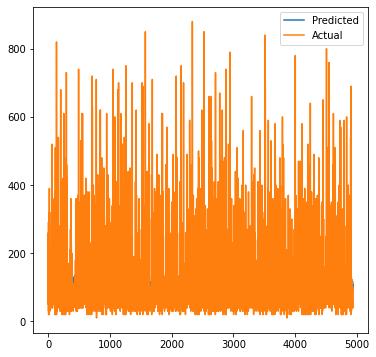

In [ ]:
plt.figure(figsize=(6,6))
plt.plot((y_pred_lasso))
plt.plot((np.array(Y2_test)))
plt.legend(["Predicted","Actual"])
plt.show()

For Test Data

In [ ]:
MSE  = mean_squared_error((Y2_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

test_r2 = r2_score((Y2_test), (y_pred_lasso))
print("Test_R2 :" ,test_r2)
print("Test_Adjusted R2 : ",1-(1-r2_score((Y2_test), (y_pred_lasso)))*((X2_test.shape[0]-1)/(X2_test.shape[0]-X2_test.shape[1]-1)))

MSE : 11045.117661880091
RMSE : 105.09575472815298
Test_R2 : 0.0202512372865441
Test_Adjusted R2 :  0.019257174012687006


For Train Data

In [ ]:
MSE2  = mean_squared_error((Y2_train), (y_pred_train))
print("MSE :" , MSE2)

RMSE2 = np.sqrt(MSE2)
print("RMSE :" ,RMSE2)

train_r2 = r2_score((Y2_train), (y_pred_train))
print("Train_R2 :" ,train_r2)
print("Train_Adjusted R2 : ",1-(1-r2_score((Y2_train), (y_pred_train)))*((X2_train.shape[0]-1)/(X2_train.shape[0]-X2_train.shape[1]-1)))

MSE : 10046.295254572595
RMSE : 100.2312089848895
Train_R2 : 0.020389944186354314
Train_Adjusted R2 :  0.02005888299817804


**Fitting all models**

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           
         ]

In [ ]:
# Run all the proposed models and update the information in a list model_data

model_data = []
for name,fit_model in models :
    fit_model_data = {}
    fit_model.random_state = 78
    fit_model_data["Name"] = name
    fit_model.fit(X2_train,Y2_train)
    fit_model_data["Train_R2_Score"] = r2_score(Y2_train,fit_model.predict(X2_train))
    fit_model_data["Test_R2_Score"] = r2_score(Y2_test,fit_model.predict(X2_test))
    fit_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y2_test,fit_model.predict(X2_test)))
    fit_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(Y2_train,fit_model.predict(X2_train)))
    model_data.append(fit_model_data)

[11:05:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_multi_df = df = pd.DataFrame(model_data)

In [ ]:
results_multi_df

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,Train_RMSE_Score
0,Lasso:,0.008459,0.007362,105.784782,100.839731
1,Ridge:,0.020389,0.020224,105.097212,100.231251
2,KNeighborsRegressor:,0.603957,0.339739,86.275146,63.730515
3,SVR:,-0.073940,-0.083584,110.524623,104.946122
4,RandomForest,0.923077,0.400993,82.175787,28.086955
5,ExtraTreeRegressor :,1.000000,0.514148,74.008194,0.049373
6,GradientBoostingClassifier:,0.152072,0.092298,101.157818,93.251496
7,XGBRegressor:,0.148503,0.093801,101.074016,93.447545


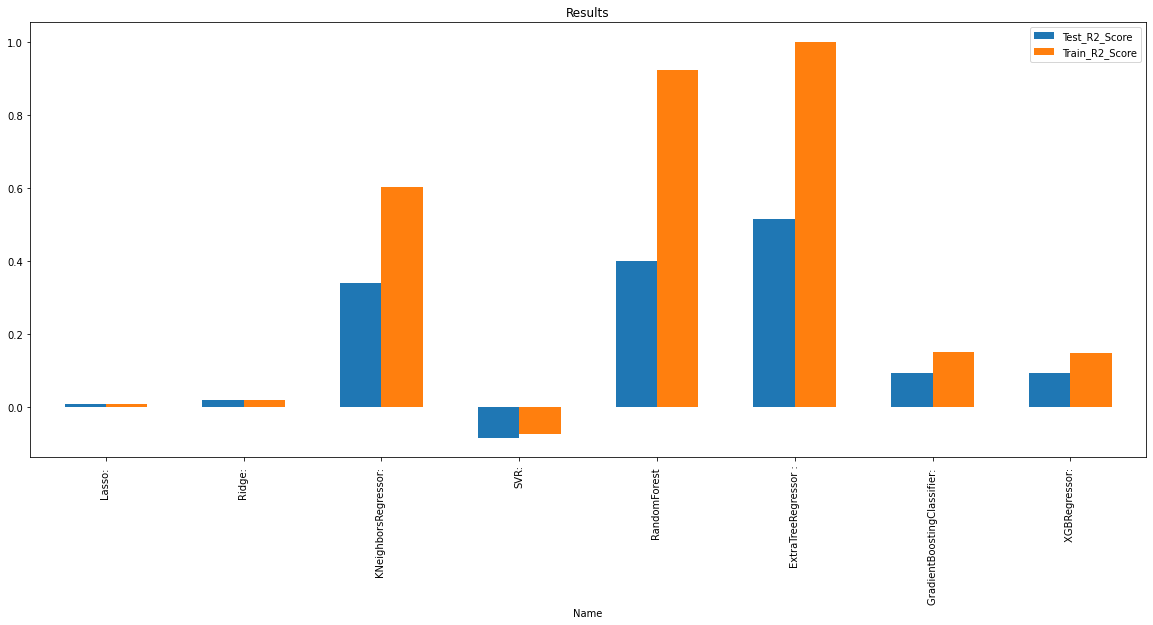

In [ ]:
results_multi_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score'], title = 'Results' , width = .6, figsize= (20,8))

***Observations***⚡:

We can see an improvement in the Lasso regression, obvious due to removal of several features.


Ridge underperformed by 15% when compared with its performance by using all features.


K-Nearest underperformed by 31% when compared with its performance by using all features.


SVR has performed the worst.


Random Forest underperformed by 31% when compared with its performance by using all features, and the hyper-parameter tuned model.


# **Conclusion**

Dataset doesn’t have any null values.

We have observed very less co-relation between the target and feature variables.

Dropped features like rv1 & rv2 as it has infinity VIF.

Top 2 models were Extra Tree Regressor & Random Forest.

Worked on Multi-Collinearity, but not much significant effect on the dataset.
Tree based models are the best ones while dealing with features which has very less correlation with the target variable. Thus, the linear models, Ridge & Lasso performed the worst.


# **Scope of Improvement**

We can work on the day/week feature to explore more on the model performance.

We can try various hyper-parameter tuning methods, neural networks can also be worked upon.

We had worked on Boruta Feature Selection for Extra Tree Regressor & Random Forest. The model had shown good results comparatively, but due to time constraint could not focus more on it.


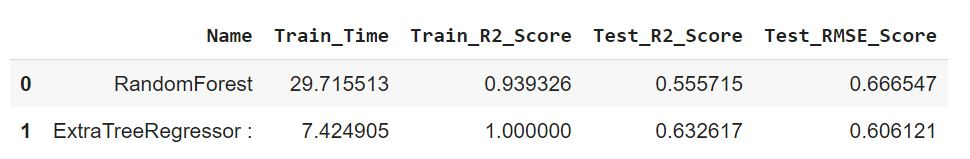